In [1]:
%matplotlib inline

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#create files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#read the city data file and save as pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
#read the ride data file and save as pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [6]:
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
#Create the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]== 'Urban']
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [8]:
#Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df['type']== 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']== 'Rural']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [9]:
#Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [10]:
#Get the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [11]:
#Get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [12]:
#Get the average fare for each city in the suburban and rural areas
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [13]:
#Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

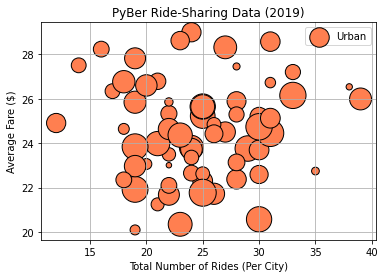

In [14]:
#Build the scatter plots for urban citeis.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#Add legend
plt.legend()

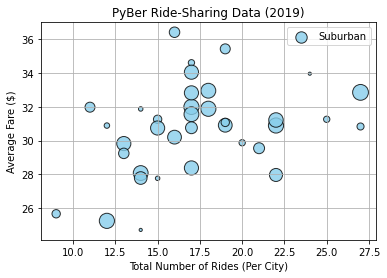

In [15]:
#Create scatter plot for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#Add the legend
plt.legend()

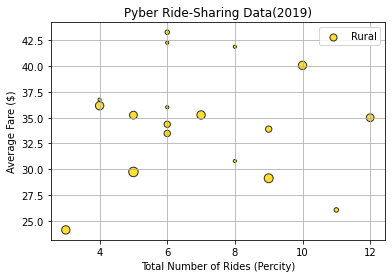

In [16]:
#Create scatter plot for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')
plt.title('Pyber Ride-Sharing Data(2019)')
plt.xlabel('Total Number of Rides (Percity)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#add the legend
plt.legend()

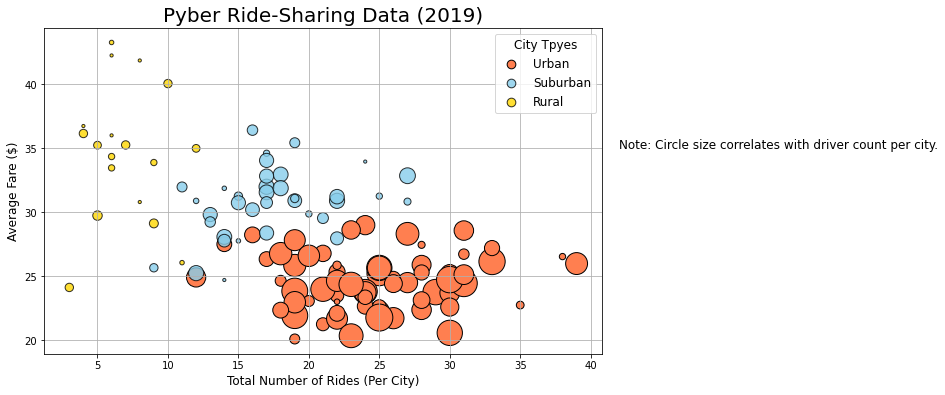

In [17]:
#Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', label='Urban')

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')

#Incorporate other graph properties
plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

#add the legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title="City Tpyes")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size
plt.text(42,35,'Note: Circle size correlates with driver count per city.', fontsize=12)

#Save the figure
plt.savefig('analysis/fig1.png')

#Show the plot
plt.show()


In [18]:
#Get summary statistics - Pandas .describe
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [19]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [20]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [21]:
#Get summary statistics - ride count - Pandas .describe
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [22]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [23]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [24]:
#Calculate the mean of the ride count for each city - Pandas .mean(), .median(), mode()
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [25]:
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [26]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [27]:
#Import NumPy and the stats modue from SciPy
import numpy as np
import scipy.stats as sts

In [28]:
#Calculate the measures of central tendency for the roude count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')
median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.')
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [29]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean ride for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')
median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.')
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')

The mean ride for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [30]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean ride for the ride counts for rural trips is {mean_rural_ride_count:.2f}')
median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.')
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean ride for the ride counts for rural trips is 6.94
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [31]:
#Get the fares from the urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [32]:
#Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')
median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')
mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is {mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [33]:
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')

The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


In [34]:
#Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [40]:
#Get mean, median, and mode for driver count for urban drivers (NumPy)
mean_urban_driver_count = np.mean(urban_drivers)
print(f'The mean number of drivers in urban cities is {mean_urban_driver_count:.2f}.')
median_urban_driver_count = np.median(urban_drivers)
print(f'The median number of drivers in urban cities is {median_urban_driver_count:.2f}.')
mode_urban_driver_count = sts.mode(urban_drivers)
print(f'The mode for the number of drivers in urban cities is {mode_urban_driver_count}.')


The mean number of drivers in urban cities is 36.68.
The median number of drivers in urban cities is 37.00.
The mode for the number of drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).


In [45]:
#Get the driver count data from the suburban cities
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

#Get mean, median, and mode for driver count for suburban drivers (NumPy)
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f'The mean number of drivers in suburban cities is {mean_suburban_driver_count:.2f}.')
median_suburban_driver_count = np.median(suburban_drivers)
print(f'The median number of drivers in suburban cities is {median_suburban_driver_count:.2f}.')
mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f'The mode for the number of drivers in suburban cities is {mode_suburban_driver_count}.')

The mean number of drivers in suburban cities is 13.71.
The median number of drivers in suburban cities is 16.00.
The mode for the number of drivers in suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [43]:
#Get the driver count data from the rural cities
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

#Get mean, median, and mode for driver count for suburban drivers (NumPy)
mean_rural_driver_count = np.mean(rural_drivers)
print(f'The mean number of drivers in rural cities is {mean_rural_driver_count:.2f}.')
median_rural_driver_count = np.median(rural_drivers)
print(f'The median number of drivers in rural cities is {median_rural_driver_count:.2f}.')
mode_rural_driver_count = sts.mode(rural_drivers)
print(f'The mode for the number of drivers in rural cities is {mode_rural_driver_count}.')

The mean number of drivers in rural cities is 4.30.
The median number of drivers in rural cities is 4.00.
The mode for the number of drivers in rural cities is ModeResult(mode=array([1]), count=array([32])).


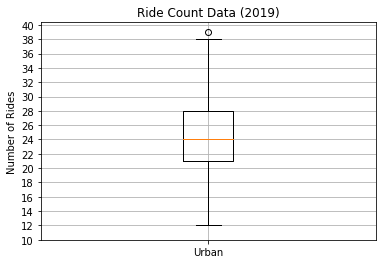

In [47]:
#Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

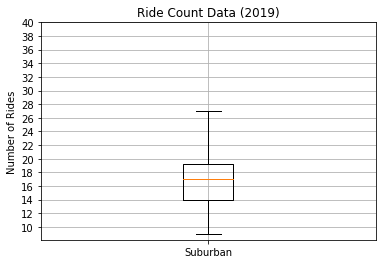

In [48]:
#Create a box-and-whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

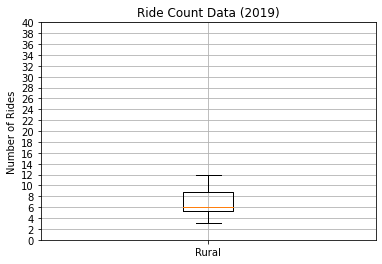

In [50]:
#Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()
plt.show()

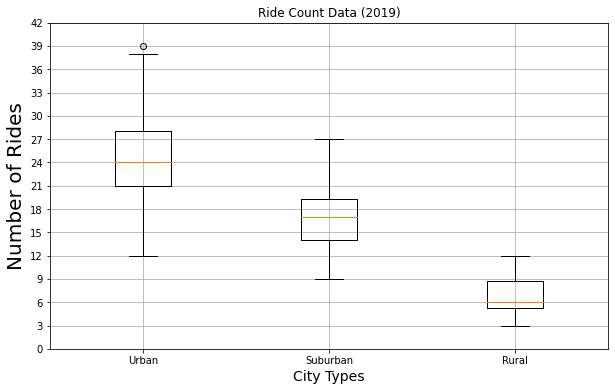

In [53]:
#Add all ride count box-and-whisker plots to the same graph
xlabels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides', fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=xlabels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig2.png')
plt.show()

In [56]:
#Get the city that matches 39 (outlier above)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


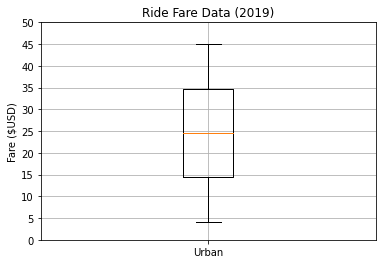

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [58]:
#Create a box-and-whisker plot for the urban fare data
x_labels = ['Urban']
fig, ax =plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

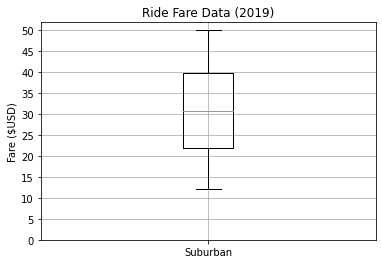

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [59]:
#Create box-and-whisker plot for suburban fares
x_labels = ['Suburban']
fig, ax =plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

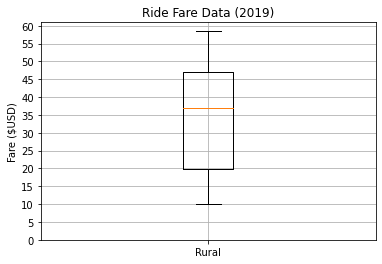

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [63]:
#Create box-and-whisker plot for rural fares
x_labels = ['Rural']
fig, ax =plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

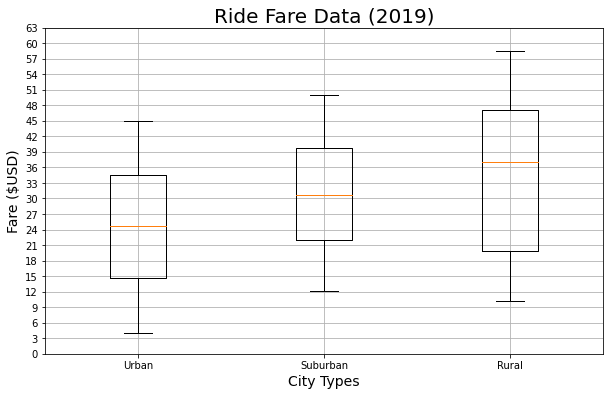

In [67]:
#Add all fare box-and-whisker plots to the same graph
xlabels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(fare_data, labels=xlabels)
ax.set_yticks(np.arange(0, 65, step=3.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig3.png')
plt.show()

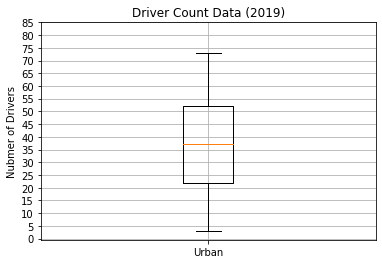

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [68]:
#Create the box-and-whisker plot for the urban driver data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#add the title, y-axis and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Nubmer of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()

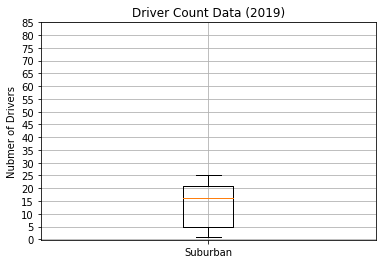

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [69]:
#Create the box-and-whisker plot for the suburban driver data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#add the title, y-axis and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Nubmer of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_drivers.describe()

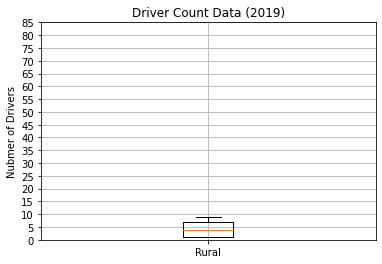

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [71]:
#Create the box-and-whisker plot for the rural driver data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#add the title, y-axis and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Nubmer of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
rural_drivers.describe()

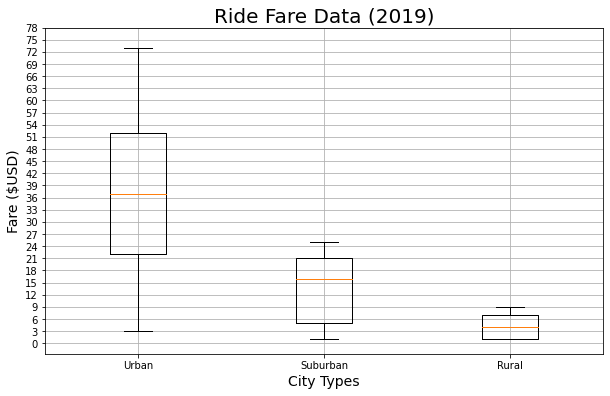

In [74]:
#Add all driver count box-and-whisker plots to the same graph
xlabels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(fare_data, labels=xlabels)
ax.set_yticks(np.arange(0, 80, step=3.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig4.png')
plt.show()